### Exploring categorical features

The Gapminder dataset that you worked with in previous chapters also contained a categorical 'Region' feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in!
Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

- Import pandas as pd.
- Read the CSV file 'gapminder.csv' into a DataFrame called df.
- Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region'). To do so, pass the column names in to df.boxplot() (in that order).

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/gapminder2.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


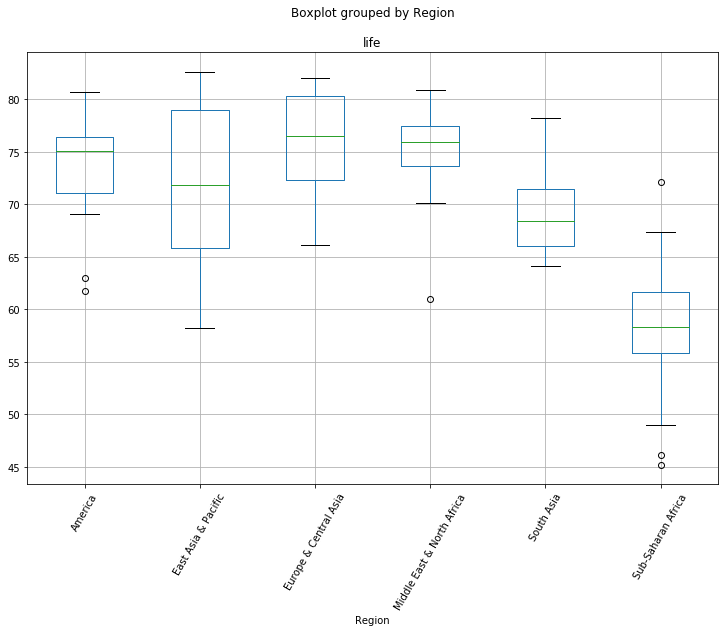

In [81]:
# Create a boxplot of life expectancy per region
df.boxplot("life", "Region", rot=60, figsize=(12,8))

# Show the plot
plt.show()

### Creating dummy variables

Scikit-learn does not accept non-numerical features. You saw in the previous exercise that the 'Region' feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

- Use the pandas `get_dummies()` function to create dummy variables from the df DataFrame. Store the result as df_region.
- Print the columns of df_region.
- Use the `get_dummies()` function again, this time specifying drop_first=True to drop the unneeded dummy variable (in this case, 'Region_America').
- print the new columns of df_region and take note of how one column was dropped!

In [82]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


* Note that "Region_America" doesn't exist in the second dataframe!

### Regression with categorical features

Having created the dummy variables from the 'Region' feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.

- Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
- Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
- Perform 5-fold cross-validation on X and y using the `cross_val_score()` function.
- Print the cross-validated scores.

In [83]:
X = df_region.drop('life', axis='columns')
y = df_region.life

In [84]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### Dropping missing data

You will see that in the dataset there are certain data points labeled with a '?'. These denote missing values. different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

- Explore the DataFrame df. Notice how the missing value is represented.
- Convert all '?' data points to np.nan.
- Count the total number of NaNs using the `.isnull()` and `.sum()` methods.
- Drop the rows with missing values from df using `.dropna()`.
- see how many rows were lost by dropping the missing values.

In [85]:
df = pd.read_csv("Data/congres2.csv")
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [86]:
import numpy as np

In [87]:
# Convert '?' to NaN
df[df == "?"] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


* When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### Imputing missing data in a ML Pipeline I

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same `.fit()` and `.predict()` methods as before.

- Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for Support Vector Classification, which is a type of SVM.
- Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
- Instantiate a SVC classifier. Store the result in clf.
- Create the steps of the pipeline by creating a list of tuples:
- The first tuple should consist of the imputation step, using imp.
- The second should consist of the classifier.

In [88]:
# Import the Imputer module
from sklearn.impute import SimpleImputer 
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy="most_frequent")

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

### Imputing missing data in a ML Pipeline II

Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the `.fit()` and `.predict()` methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.

- Import the following modules:
    - Imputer from sklearn.preprocessing and Pipeline from sklearn.pipeline.
    - SVC from sklearn.svm.
- Create the pipeline using `Pipeline()` and steps.
- Create training and test sets. Use 30% of the data for testing and a random state of 42.
- Fit the pipeline to the training set and predict the labels of the test set.
- Compute the classification report.

In [89]:
X = pd.read_csv("Data/X2.csv")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 16 columns):
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16)
memory usage: 54.5 KB


In [90]:
df = pd.read_csv("Data/y2.csv")
y = np.ravel(df)
y.shape

(435,)

In [91]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.64      0.91      0.75        82
  republican       0.50      0.14      0.22        49

    accuracy                           0.63       131
   macro avg       0.57      0.53      0.49       131
weighted avg       0.59      0.63      0.55       131



### Centering and scaling your data

the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.

You will now explore scaling for yourself on a new dataset - White Wine Quality! We have used the 'quality' feature of the wine to create a binary target variable: If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.

The DataFrame has been pre-loaded as df, along with the feature and target variable arrays X and y. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. 'density', for instance, takes values between 0.98 and 1.04, while 'total sulfur dioxide' ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.

- Import scale from sklearn.preprocessing.
- Scale the features X using `scale()`.
- Print the mean and standard deviation of the unscaled features X, and then the scaled features X_scaled. Use the numpy functions `np.mean()` and `np.std()` to compute the mean and standard deviations.

In [92]:
df =pd.read_csv("Data/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [93]:
df['quality'] = np.where(df['quality'] < 5, 1, 0)

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [95]:
X = df.drop('quality', axis=1).values
y = df.quality.values

In [96]:
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [97]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


### Centering and scaling in a pipeline

With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided.

The feature array and target variable array have been pre-loaded as X and y. 

- Import the following modules:
    - StandardScaler from sklearn.preprocessing.
    - Pipeline from sklearn.pipeline.
- Complete the steps of the pipeline with `StandardScaler()` for 'scaler' and `KNeighborsClassifier()` for 'knn'.
- Create the pipeline using `Pipeline()` and steps.
- Create training and test sets, with 30% used for testing. Use a random state of 42.
- Fit the pipeline to the training set.
- Compute the accuracy scores of the scaled and unscaled models by using the `.score()` method inside the provided print() functions.

In [99]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


### Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

- Setup the pipeline with the following steps:
    - Scaling, called 'scaler' with StandardScaler().
    - Classification, called 'SVM' with SVC().
- Specify the hyperparameter space using the following notation: 'step_name__parameter_name'. Here, the step_name is SVM, and the parameter_names are C and gamma.
- Create training and test sets, with 20% of the data used for the test set. Use a random state of 21.
- Instantiate GridSearchCV with the pipeline and hyperparameter space and fit it to the training set. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
- Predict the labels of the test set and compute the metrics.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import ElasticNet

In [101]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


### Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

- Set up a pipeline with the following steps:
    - 'imputation', which uses the `Imputer()` transformer and the 'mean' strategy to impute missing data ('NaN') using the mean of the column.
    - 'scaler', which scales the features using `StandardScaler()`.
    - 'elasticnet', which instantiates an `ElasticNet()` regressor.
- Specify the hyperparameter space for the l1 ratio using the following notation: 'step_name__parameter_name'. Here, the step_name is elasticnet, and the parameter_name is l1_ratio.
- Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
- Instantiate GridSearchCV with the pipeline and hyperparameter space. Use 3-fold cross-validation (This is the default, so you don't have to specify it).
- Fit the GridSearchCV object to the training set.
- Compute R2 and the best parameters. 

In [102]:
Xlist = [[34811059.0, 2.73, 0.1, 3.328944661018629, 24.5962, 12314.0, 129.9049, 29.5], [19842251.0, 6.43, 2.0, 1.4743533878509398, 22.25083, 7103.0, 130.1247, 192.0], [40381860.0, 2.24, 0.5, 4.78516998252535, 27.5017, 14646.0, 118.8915, 15.4], [2975029.0, 1.4, 0.1, 1.8041062172001001, 25.355420000000002, 7383.0, 132.8108, 20.0], [21370348.0, 1.96, 0.1, 18.0163132681972, 27.56373, 41312.0, 117.3755, 5.2], [8331465.0, 1.41, 0.3, 8.18316001754696, 26.467409999999997, 43952.0, 124.1394, 4.6], [8868713.0, 1.99, 0.1, 5.10953829181389, 25.65117, 14365.0, 128.6024, 43.3], [348587.0, 1.89, 3.1, 3.13192132134112, 27.24594, 24373.0, 124.3862, 14.5], [148252473.0, 2.38, 0.06, 0.31916100201885805, 20.39742, 2265.0, 125.0307, 55.9], [277315.0, 1.83, 1.3, 6.00827883508462, 26.384390000000003, 16075.0, 126.39399999999999, 15.4], [9526453.0, 1.42, 0.2, 6.48817388016763, 26.16443, 14488.0, 129.7968, 7.2], [10779155.0, 1.82, 0.2, 9.79733671427737, 26.75915, 41641.0, 121.8227, 4.7], [306165.0, 2.91, 2.4, 1.3601259202571898, 27.02255, 8293.0, 120.9224, 20.1], [8973525.0, 5.27, 1.2, 0.5375391835148801, 22.41835, 1646.0, 130.2723, 116.3], [694990.0, 2.51, 0.2, 0.601210310020156, 22.8218, 5663.0, 125.1258, 48.1], [9599916.0, 3.48, 0.2, 1.43182915030318, 24.43335, 5066.0, 122.4155, 52.0], [1967866.0, 2.86, 24.9, 2.5472054915144904, 22.129839999999998, 13858.0, 133.1307, 63.8], [194769696.0, 1.9, 0.45, 2.02377283620826, 25.78623, 13906.0, 124.8745, 18.6], [7513646.0, 1.43, 0.1, 6.69013908249446, 26.542859999999997, 15368.0, 128.4721, 13.7], [14709011.0, 6.04, 1.2, 0.109419170900456, 21.27157, 1358.0, 130.6651, 130.4], [8821795.0, 6.48, 3.5, 0.031388801289793995, 21.50291, 723.0, 134.1955, 108.6], [13933660.0, 3.05, 0.6, 0.28754749573718796, 20.80496, 2442.0, 117.5528, 51.5], [19570418.0, 5.17, 5.3, 0.29554163922618, 23.681729999999998, 2571.0, 127.2823, 113.8], [33363256.0, 1.68, 0.2, 16.350398627330502, 27.4521, 41468.0, 118.0571, 5.8], [11139740.0, 6.81, 3.4, 0.047839126373075, 21.485689999999998, 1753.0, 127.86399999999999, 168.0], [16645940.0, 1.89, 0.4, 4.24025913623095, 27.015420000000002, 18698.0, 125.5417, 8.9], [44901660.0, 2.43, 0.5, 1.4760918200836202, 24.94041, 10489.0, 124.0235, 19.7], [665414.0, 5.05, 0.06, 0.17885306407817494, 22.06131, 1440.0, 132.1354, 91.2], [3832771.0, 5.1, 3.5, 0.3842204768660961, 21.87134, 5022.0, 131.6935, 72.6], [4429506.0, 1.91, 0.3, 1.9119334188978503, 26.47897, 12219.0, 121.35, 10.3], [19261647.0, 4.91, 3.7, 0.361896602941861, 22.56469, 2854.0, 131.5237, 116.9], [4344151.0, 1.43, 0.06, 5.28790257621164, 26.596290000000003, 21873.0, 130.3921, 5.9], [11290239.0, 1.5, 0.1, 2.7017771665481, 25.06867, 17765.0, 126.0594, 6.3], [5495302.0, 1.89, 0.2, 8.54150780114596, 26.13287, 45017.0, 119.5815, 4.3], [809639.0, 3.76, 2.6, 0.612799523785036, 23.38403, 2502.0, 129.3376, 81.0], [14447600.0, 2.73, 0.4, 2.1105178014248, 25.58841, 9244.0, 122.9864, 26.8], [78976122.0, 2.95, 0.06, 2.51239420485077, 26.732429999999997, 9974.0, 125.0931, 31.4], [6004199.0, 2.32, 0.8, 1.06776463433017, 26.36751, 7450.0, 119.9321, 21.6], [686223.0, 5.31, 4.7, 6.798253229396759, 23.7664, 40143.0, 132.0392, 118.4], [4500638.0, 5.16, 0.8, 0.08374564419905099, 20.885089999999998, 1088.0, 125.7948, 60.4], [1339941.0, 1.62, 1.2, 13.0313788748608, 26.264459999999996, 24743.0, 129.5161, 5.5], [843206.0, 2.74, 0.1, 1.27777955576417, 26.53078, 7129.0, 127.4768, 24.0], [5314170.0, 1.85, 0.1, 10.6441142837652, 26.733390000000004, 42122.0, 126.5645, 3.3], [62309529.0, 1.97, 0.4, 5.9990207264502295, 25.853289999999998, 37505.0, 120.0146, 4.3], [1473741.0, 4.28, 5.3, 1.07953931688168, 24.0762, 15800.0, 130.3625, 68.0], [1586749.0, 5.8, 1.7, 0.251002328494815, 21.65029, 1566.0, 130.208, 87.4], [4343290.0, 1.79, 0.1, 1.4194297793044999, 25.54942, 5900.0, 130.5789, 19.3], [80665906.0, 1.37, 0.1, 9.497246756545973, 27.16509000000001, 41199.0, 124.9044, 4.4], [23115919.0, 4.19, 1.8, 0.36660084873269, 22.842470000000002, 2907.0, 128.2953, 79.9], [11161755.0, 1.46, 0.1, 8.66123553121303, 26.33786, 32197.0, 122.9342, 4.9], [14106687.0, 4.12, 0.8, 0.835594820071747, 25.29947, 6960.0, 120.9596, 36.9], [10427356.0, 5.34, 1.4, 0.12696440010279902, 22.52449, 1230.0, 132.2765, 121.0], [1561293.0, 5.25, 2.5, 0.156376432466591, 21.64338, 1326.0, 130.7627, 127.6], [748096.0, 2.74, 1.2, 2.07341531196141, 23.68465, 5208.0, 125.1512, 41.9], [9705130.0, 3.5, 2.0, 0.24930675467243002, 23.66302, 1600.0, 125.3461, 83.3], [7259470.0, 3.27, 0.8, 1.1874535163184798, 25.10872, 4391.0, 122.9621, 26.5], [10050699.0, 1.33, 0.06, 5.45323172371614, 27.115679999999998, 23334.0, 128.6968, 7.2], [310033.0, 2.12, 0.3, 6.8219030512940995, 27.206870000000002, 42294.0, 118.7381, 2.7], [1197070109.0, 2.64, 0.32, 1.5208494207295702, 20.95956, 3901.0, 123.1274, 65.6], [235360765.0, 2.48, 0.2, 1.7550442204323995, 21.85576, 7856.0, 126.4216, 36.2], [72530693.0, 1.88, 0.2, 7.89221094080634, 25.310029999999998, 15955.0, 125.1859, 21.4], [4480145.0, 2.0, 0.2, 9.88253103434228, 27.65325, 47713.0, 124.7801, 4.5], [7093808.0, 2.92, 0.2, 10.0011881389889, 27.13151, 28562.0, 121.0838, 4.9], [59319234.0, 1.39, 0.3, 7.465942414501621, 26.4802, 37475.0, 123.70299999999999, 4.1], [2717344.0, 2.39, 1.7, 4.39145647399792, 24.00421, 8951.0, 125.3685, 18.9], [127317900.0, 1.34, 0.06, 9.536605685814381, 23.50004, 34800.0, 121.9651, 3.4], [15915966.0, 2.51, 0.1, 14.718104264070801, 26.290779999999998, 18797.0, 128.8517, 25.9], [38244442.0, 4.76, 6.3, 0.266308378184837, 21.592579999999998, 2358.0, 129.9341, 71.0], [2144215.0, 1.5, 0.6, 3.34184866312845, 26.45693, 20977.0, 129.5746, 10.5], [4109389.0, 1.57, 0.1, 3.996721795381, 27.20117, 14158.0, 127.5037, 11.3], [1972194.0, 3.34, 23.6, 0.00861766941868, 21.90157, 2041.0, 131.1361, 114.2], [3672782.0, 5.19, 1.6, 0.15735218279458202, 21.89537, 588.0, 131.2555, 100.9], [3219802.0, 1.42, 0.1, 4.49848339141717, 26.86102, 23223.0, 130.8226, 8.2], [485079.0, 1.63, 0.3, 22.1680796908671, 27.434040000000003, 95001.0, 122.3705, 2.8], [19926798.0, 4.79, 0.2, 0.09942214756409101, 21.403470000000002, 1528.0, 132.8371, 66.7], [13904671.0, 5.78, 11.2, 0.082469880821383, 22.034679999999998, 674.0, 133.939, 101.1], [27197419.0, 2.05, 0.5, 7.75223394597224, 24.73069, 19968.0, 123.8593, 8.0], [321026.0, 2.38, 0.06, 3.27772576758378, 23.219910000000002, 12029.0, 123.3223, 16.0], [14223403.0, 6.82, 1.0, 0.041078866582894995, 21.78881, 1602.0, 128.0308, 148.3], [406392.0, 1.38, 0.1, 6.18277102166305, 27.683609999999998, 27872.0, 124.1571, 6.6], [3414552.0, 4.94, 0.7, 0.613103977214908, 22.62295, 3356.0, 129.9875, 103.0], [1238013.0, 1.58, 0.9, 3.07876289709044, 25.15669, 14615.0, 130.8786, 15.8], [114972821.0, 2.35, 0.3, 4.26117186643567, 27.42468, 15826.0, 122.1216, 17.9], [4111168.0, 1.49, 0.4, 1.3133211868088002, 24.2369, 3890.0, 129.9424, 17.6], [2629666.0, 2.37, 0.06, 3.7594868153666496, 24.88385, 7563.0, 129.7504, 34.8], [31350544.0, 2.44, 0.1, 1.5940831352875, 25.63182, 6091.0, 126.5284, 35.8], [22994867.0, 5.54, 11.4, 0.10474830108643901, 21.93536, 864.0, 135.3949, 114.4], [51030006.0, 2.05, 0.6, 0.191053400032007, 21.44932, 2891.0, 123.1421, 87.2], [26325183.0, 2.9, 0.4, 0.10541298260343301, 20.76344, 1866.0, 125.5561, 50.7], [16519862.0, 1.77, 0.2, 10.5330281250037, 26.01541, 47388.0, 121.695, 4.8], [4285380.0, 2.12, 0.1, 8.00908440122814, 27.768929999999997, 32122.0, 118.7421, 6.4], [5594524.0, 2.72, 0.2, 0.7781516131060459, 25.77291, 4060.0, 123.4792, 28.1], [15085130.0, 7.59, 0.8, 0.063437108830928, 21.21958, 843.0, 135.1021, 141.3], [151115683.0, 6.02, 3.6, 0.6146896621193599, 23.03322, 4684.0, 135.49200000000002, 140.9], [4771633.0, 1.96, 0.1, 10.5297687913484, 26.93424000000001, 65216.0, 126.0266, 3.6], [2652281.0, 2.89, 0.1, 15.572080457708399, 26.241090000000003, 47799.0, 126.887, 11.9], [163096985.0, 3.58, 0.1, 0.935618056464575, 22.299139999999998, 4187.0, 126.5196, 95.5], [3498679.0, 2.61, 0.9, 2.2237963430752403, 26.26959, 14033.0, 122.6829, 21.0], [6540267.0, 4.07, 0.9, 0.53074633684253, 25.015060000000002, 1982.0, 120.0524, 69.7], [6047131.0, 3.06, 0.3, 0.6985817458348059, 25.54223, 6684.0, 123.615, 25.7], [28642048.0, 2.58, 0.4, 1.45013443843679, 24.770410000000002, 9249.0, 119.6368, 23.2], [90297115.0, 3.26, 0.06, 0.8421206970145141, 22.872629999999997, 5332.0, 122.3459, 33.4], [38525752.0, 1.33, 0.1, 8.27076714913332, 26.6738, 19996.0, 129.6765, 6.7], [10577458.0, 1.36, 0.5, 5.48692639969689, 26.68445, 27747.0, 127.2631, 4.1], [1388962.0, 2.2, 0.06, 48.7020615159807, 28.13138, 126076.0, 126.3153, 9.5], [20741669.0, 1.34, 0.1, 4.38344907454584, 25.41069, 18032.0, 128.7553, 16.1], [143123163.0, 1.49, 1.0, 11.9827176136868, 26.01131, 22506.0, 128.4903, 13.5], [9750314.0, 5.06, 2.9, 0.054244469829612, 22.55453, 1173.0, 135.1005, 78.3], [12229703.0, 5.11, 0.8, 0.461633711070406, 21.927429999999998, 2162.0, 130.2795, 75.8], [9109535.0, 1.41, 0.1, 5.271222676540639, 26.51495, 12522.0, 130.3755, 8.0], [5521838.0, 5.13, 1.6, 0.11825577542260099, 22.53139, 1289.0, 134.716, 179.1], [4849641.0, 1.28, 0.1, 4.11444075456769, 23.83996, 65991.0, 121.1736, 2.8], [5396710.0, 1.31, 0.06, 6.90165445635826, 26.92717, 24670.0, 129.528, 8.8], [2030599.0, 1.43, 0.06, 8.51182819568071, 27.43983, 30816.0, 129.9231, 3.7], [9132589.0, 7.06, 0.6, 0.06821888923508901, 21.969170000000002, 615.0, 131.5318, 168.5], [50348811.0, 2.54, 17.9, 9.42796037329193, 26.85538, 12263.0, 130.9949, 66.1], [45817016.0, 1.42, 0.4, 7.29308875758134, 27.49975, 34676.0, 122.0453, 5.0], [19949553.0, 2.32, 0.06, 0.5807910881610201, 21.96671, 6907.0, 124.8615, 11.7], [34470138.0, 4.79, 1.0, 0.3821179446909601, 22.40484, 3246.0, 129.7199, 84.7], [506657.0, 2.41, 1.0, 4.7411399704115595, 25.49887, 13470.0, 124.6358, 26.4], [1153750.0, 3.7, 25.9, 0.949860795263562, 23.16969, 5887.0, 131.8793, 112.2], [9226333.0, 1.92, 0.1, 5.31568839898759, 26.37629, 43421.0, 122.9473, 3.2], [7646542.0, 1.47, 0.4, 5.33305762439957, 26.20195, 55020.0, 119.6465, 4.7], [7254072.0, 3.7, 0.2, 0.45316766037761397, 23.77966, 2001.0, 129.9657, 56.2], [42844744.0, 5.54, 5.8, 0.15467299547587196, 22.47792, 2030.0, 130.8328, 72.4], [66453255.0, 1.48, 1.3, 3.83510188812475, 23.008029999999998, 12216.0, 120.4969, 15.6], [6052937.0, 4.88, 3.2, 0.25198333736379697, 21.87875, 1219.0, 131.0248, 96.4], [1315372.0, 1.8, 1.5, 31.9577172737108, 26.396690000000003, 30875.0, 124.9939, 24.9], [10408091.0, 2.04, 0.06, 2.44066947552979, 25.15699, 9938.0, 128.6291, 19.4], [70344357.0, 2.15, 0.06, 4.0219025893496205, 26.703709999999997, 16454.0, 124.0675, 22.2], [31014427.0, 6.34, 6.4, 0.10085283934885099, 22.35833, 1437.0, 134.5204, 89.3], [46028476.0, 1.38, 1.1, 7.03235907972496, 25.42379, 8762.0, 131.4962, 12.9], [61689620.0, 1.87, 0.2, 8.52646681764135, 27.392490000000002, 37739.0, 124.0845, 5.6], [304473143.0, 2.07, 0.6, 18.5459916953635, 28.456979999999998, 50384.0, 118.4777, 7.7], [3350832.0, 2.11, 0.5, 2.4897635471798303, 26.39123, 15317.0, 124.2604, 13.0], [26952719.0, 2.46, 0.1, 4.47666901860092, 25.32054, 3733.0, 124.3462, 49.2], [86589342.0, 1.86, 0.4, 1.47934657540447, 20.9163, 4085.0, 121.9367, 26.2], [13114579.0, 5.88, 13.6, 0.14898151358324696, 20.68321, 3039.0, 132.4493, 94.9], [13495462.0, 3.85, 15.1, 0.6543231897712061, 22.0266, 1286.0, 131.9745, 98.3]]
X = np.array(Xlist)

In [103]:
ylist = [75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1, 79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2, 56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8, 78.7, 61.0, 74.0, 70.1, 74.1, 56.7, 60.4, 74.0, 65.7, 79.4, 81.0, 57.5, 62.2, 72.1, 80.0, 62.7, 79.5, 70.8, 58.3, 51.3, 63.0, 61.7, 70.9, 73.8, 82.0, 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6, 66.1, 61.5, 72.3, 77.6, 45.2, 61.0, 72.0, 80.7, 63.4, 51.4, 74.5, 78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55.0, 60.8, 68.6, 80.3, 80.2, 75.2, 59.7, 58.0, 80.7, 74.6, 64.1, 77.1, 58.2, 73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4, 55.9, 80.9, 74.8, 78.5, 56.7, 55.0, 81.1, 74.3, 67.4, 69.1, 46.1, 81.1, 81.9, 69.5, 59.7, 74.1, 60.0, 71.3, 76.5, 75.1, 57.2, 68.2, 79.5, 78.2, 76.0, 68.7, 75.4, 52.0, 49.0]
y = np.array(ylist)

In [79]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet(max_iter=50000000))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"elasticnet__l1_ratio":np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state= 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.1314109388954, tolerance: 0.5801944179104479
  positive)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


Source: Datacamp